In [1]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import numpy as np
import pandas as pd

# **data retrieval**

In [ ]:
from pathlib import Path
def load_medical_data():
    csv_path = Path('/content/drive/MyDrive/medical_insurance.csv')
    return pd.read_csv(csv_path,)
medical_insurance=load_medical_data()




## **Take a Quick Look at the Data Structure**

In [ ]:
medical_insurance.head()



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
medical_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
medical_insurance["sex"].value_counts()

,count
sex,
male,1406
female,1366


In [ ]:
medical_insurance["smoker"].value_counts()

,count
smoker,
no,2208
yes,564


In [ ]:
medical_insurance["region"].value_counts()

,count
region,
southeast,766
southwest,684
northwest,664
northeast,658


In [ ]:
medical_insurance.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


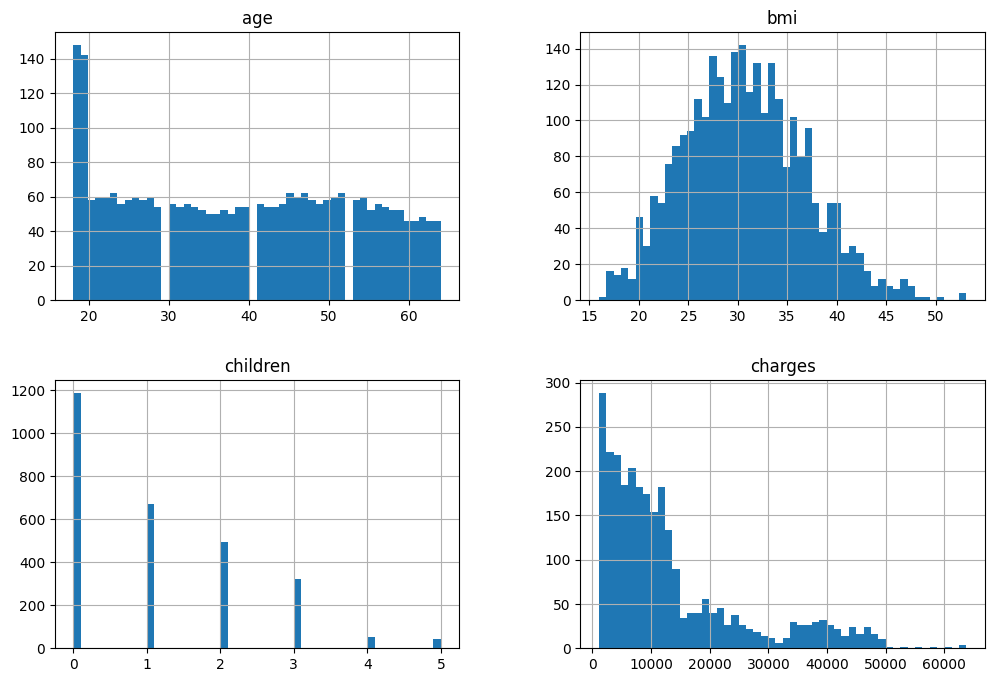

In [ ]:
import matplotlib.pyplot as plt
medical_insurance.hist(bins=50, figsize=(12, 8))
plt.show()

# **Create a test Set**

In [ ]:
np.random.seed(42)

In [ ]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
    medical_insurance, test_size=0.2, stratify=medical_insurance["smoker"], random_state=42)

In [ ]:
len(strat_train_set)

2217

In [ ]:

len(strat_test_set)

555

In [ ]:
strat_test_set["smoker"].value_counts() / len(strat_test_set)

,count
smoker,
no,0.796396
yes,0.203604


# **Discover and Visualize the Data to Gain Insights**

In [ ]:
medical = strat_train_set.copy()

**Looking for Correlations**

In [ ]:
corr_matrix = medical.corr(numeric_only=True)
corr_matrix["charges"].sort_values(ascending=False)

,charges
charges,1.000000
age,0.307241
bmi,0.208486
children,0.064084


# **Prepare the Data for Machine Learning Algorithms**

In [ ]:
medical = strat_train_set.drop("charges", axis=1)
medical_labels = strat_train_set["charges"].copy()

**Data Cleaning**

In [ ]:
#pas de valeurs
null_rows_idx = medical.isnull().any(axis=1)
medical.loc[null_rows_idx].head()

,age,sex,bmi,children,smoker,region


**Handling Text and Categorical Attributes**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_features = ["sex", "smoker", "region"]
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoded = encoder.fit_transform(medical[cat_features])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(cat_features),
    index=medical.index
)
medical_encoded = pd.concat(
    [medical.drop(columns=cat_features), encoded_df],
    axis=1
)

In [ ]:
medical_encoded.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1291,19,34.900,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1334,18,31.920,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
466,60,28.700,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
863,36,19.855,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1936,63,30.800,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
medical_temp = medical_encoded.copy()
medical_temp["charge"]=medical_labels
corr_matrix = medical_temp.corr(numeric_only=True)
corr_matrix["charge"].sort_values(ascending=False)

,charge
charge,1.000000
smoker_yes,0.794550
age,0.307241
bmi,0.208486
region_southeast,0.088127
sex_male,0.074361
children,0.064084
region_northeast,0.010571
region_northwest,-0.041158
region_southwest,-0.060771


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
medical_encoded[["age","children","bmi"]]= std_scaler.fit_transform(medical_encoded[["age","children","bmi"]])

In [ ]:
medical_encoded.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1291,-1.418525,0.709924,-0.899317,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1334,-1.489345,0.218369,-0.899317,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
466,1.485129,-0.312775,-0.074757,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
863,-0.214571,-1.771770,-0.899317,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1936,1.697591,0.033623,-0.899317,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42, contamination=0.2)
outlier_pred = isolation_forest.fit_predict(medical_encoded)
outlier_pred


array([-1,  1,  1, ..., -1,  1, -1])

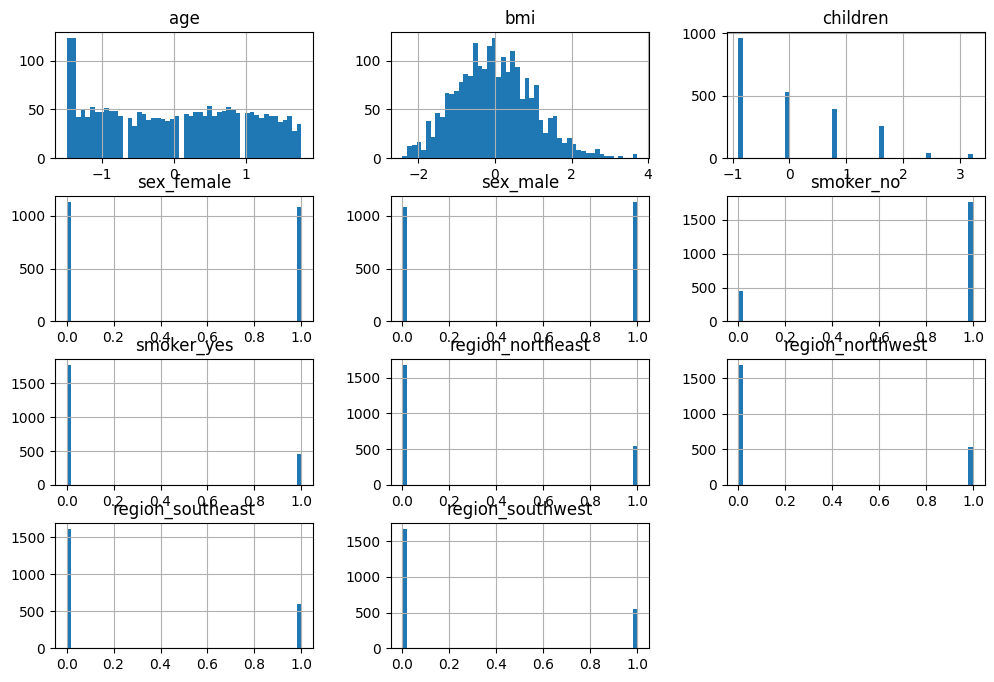

In [ ]:
import matplotlib.pyplot as plt
medical_encoded.hist(bins=50, figsize=(12, 8))
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(medical_labels.to_frame())

model = LinearRegression()
model.fit(medical_encoded[["smoker_yes"]], scaled_labels)
some_new_data = medical_encoded[["smoker_yes"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [ ]:
some_new_data

,smoker_yes
1291,1.0
1334,0.0
466,0.0
863,0.0
1936,0.0


In [ ]:
predictions

array([[32446.00463007],
       [ 8351.65941955],
       [ 8351.65941955],
       [ 8351.65941955],
       [ 8351.65941955]])

**Transformation Pipelines**

In [ ]:
# Repartir des données originales
medical = strat_train_set.drop("charges", axis=1)
charges_labels = strat_train_set["charges"].copy()

In [ ]:
medical.head()

,age,sex,bmi,children,smoker,region
1291,19,male,34.900,0,yes,southwest
1334,18,female,31.920,0,no,northeast
466,60,female,28.700,1,no,southwest
863,36,female,19.855,0,no,northeast
1936,63,male,30.800,0,no,southwest


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pipeline pour les features numériques (sans imputation)
num_pipeline = Pipeline([
    ("standardize", StandardScaler()),
])

# Pipeline pour les features catégorielles (sans imputation)
cat_pipeline = Pipeline([
    ("encode", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
])

# Combiner les pipelines
num_attribs = ["age", "bmi", "children"]
cat_attribs = ["sex", "smoker", "region"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])




# **Select and Train a** **Model**

**Training and Evaluating on the Training Set**

**regression lineaire**

---



In [ ]:
from sklearn.linear_model import LinearRegression

RL_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("model", LinearRegression())
])

# Entraîner le pipeline
RL_pipeline.fit(medical, charges_labels)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', LinearRegression())])

In [ ]:
charges_labels[:5]

,charges
1291,34828.65400
1334,2205.98080
466,13224.69300
863,5458.04645
1936,13390.55900


In [ ]:
#prediction
charge_predictions = RL_pipeline.predict(medical)
charge_predictions[:5]

array([27616.5385756 ,  3424.19829367, 12324.91518141,  4036.74228402,
       13423.0871675 ])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def root_mean_squared_error(labels, predictions):
    return np.sqrt(mean_squared_error(labels, predictions))

RL_rmse = root_mean_squared_error(charges_labels, charge_predictions)
RL_mae = mean_absolute_error(charges_labels, charge_predictions)

print(f"RMSE: {RL_rmse}")
print(f"MAE: {RL_mae}")


RMSE: 6026.097770230247
MAE: 4132.00774929447


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("model", DecisionTreeRegressor(random_state=42))
])

# Entraîner le pipeline
DT_pipeline.fit(medical, charges_labels)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', DecisionTreeRegressor(random_state=42))])

In [ ]:
Dcharges_predictions = DT_pipeline.predict(medical)

tree_rmse = root_mean_squared_error(charges_labels, Dcharges_predictions)
tree_mae = mean_absolute_error(charges_labels, Dcharges_predictions)
print(f"RMSE: {tree_rmse}")
print(f"MAE: {tree_mae}")


RMSE: 460.71622314133674
MAE: 24.786214900015036


**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Rf_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("model", RandomForestRegressor(random_state=42))
])

# Entraîner le pipeline
Rf_pipeline.fit(medical, charges_labels)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
#prediction
Rfcharge_predictions = Rf_pipeline.predict(medical)
Rfcharge_predictions[:5]

array([34837.41737   ,  2355.32260062, 13372.6949211 ,  5238.58078   ,
       13438.183819  ])

In [ ]:
forest_rmse = root_mean_squared_error(charges_labels, Rfcharge_predictions)
forest_mae = mean_absolute_error(charges_labels, Rfcharge_predictions)
print(f"RMSE: {forest_rmse}")
print(f"MAE: {forest_mae}")

RMSE: 1105.3707724213994
MAE: 472.87857375638356


# **Better Evaluation Using Cross-Validation**

In [ ]:
#regression lineaire
from sklearn.model_selection import cross_val_score

lin_rmses = -cross_val_score(RL_pipeline, medical, charges_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,6041.688463
std,390.465337
min,5402.878713
25%,5868.425565
50%,6157.168643
75%,6337.009632
max,6496.137545


In [ ]:
#randomforest
forest_rmses = -cross_val_score(Rf_pipeline, medical, charges_labels,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,3329.056857
std,481.795551
min,2426.730416
25%,3045.100040
50%,3329.112981
75%,3573.856230
max,4147.734038


In [ ]:
#decision tree

tree_rmses = -cross_val_score(DT_pipeline ,medical, charges_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,3950.816176
std,733.131603
min,2392.510405
25%,3645.814407
50%,3869.342704
75%,4422.147100
max,4919.586532


# **Fine-Tune Your Model**

**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = {
    "random_forest__n_estimators": [100,200,500],
    "random_forest__max_depth": [None, 10, 20, 30],
    "random_forest__max_features": [4, 6, "sqrt"],

}
grid_search = GridSearchCV(
    full_pipeline,
    param_grid,
    cv=10,
    scoring='neg_root_mean_squared_error'
)

grid_search.fit(medical, charges_labels)



GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('standardize',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'random_forest__max_depth': [None, 10, 20, 30],
                         'random_forest__max_features': [4, 6, 'sqrt'],
                         'random_forest__n_estimators': [100, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.best_params_


{'random_forest__max_depth': 20,
 'random_forest__max_features': 6,
 'random_forest__n_estimators': 200}

In [ ]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=20, max_features=6,
                                       n_estimators=200, random_state=42))])

In [ ]:
import pandas as pd
import numpy as np

# Récupérer les résultats de GridSearch
cv_res = pd.DataFrame(grid_search.cv_results_)

# Trier par score moyen
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# Générer les noms des splits pour cv=10
split_cols = [f"split{i}_test_score" for i in range(10)]

# Sélectionner les colonnes utiles
cv_res = cv_res[["param_random_forest__n_estimators",
                 "param_random_forest__max_depth",
                 "param_random_forest__max_features"] + split_cols + ["mean_test_score"]]

# Renommer les colonnes pour plus de clarté
cv_res.columns = ["n_estimators", "max_depth", "max_features"] + [f"split{i}_rmse" for i in range(10)] + ["mean_test_rmse"]

# Convertir -RMSE → RMSE positif
rmse_cols = [f"split{i}_rmse" for i in range(10)] + ["mean_test_rmse"]
cv_res[rmse_cols] = -cv_res[rmse_cols].round(2)

# Afficher les meilleures combinaisons
cv_res.head(10)


,n_estimators,max_depth,max_features,split0_rmse,split1_rmse,split2_rmse,split3_rmse,split4_rmse,split5_rmse,split6_rmse,split7_rmse,split8_rmse,split9_rmse,mean_test_rmse
22,200,20,6,3330.60,3462.92,2891.31,3002.43,3300.84,2460.99,3385.32,4060.17,2879.10,3076.38,3185.01
5,500,None,6,3336.78,3477.75,2915.80,2979.93,3292.23,2477.76,3357.25,4056.99,2896.78,3062.06,3185.33
32,500,30,6,3336.78,3477.75,2915.80,2979.93,3292.23,2477.76,3357.25,4056.99,2896.78,3062.06,3185.33
4,200,None,6,3333.64,3459.52,2897.23,2986.20,3296.53,2467.28,3385.72,4069.00,2881.60,3083.78,3186.05
31,200,30,6,3333.64,3459.52,2897.23,2986.20,3296.53,2467.28,3385.72,4069.00,2881.60,3083.78,3186.05
19,200,20,4,3286.72,3420.65,2940.30,3075.55,3338.03,2532.65,3322.70,4115.24,2843.75,2985.98,3186.16
20,500,20,4,3305.66,3430.12,2912.03,3080.08,3350.00,2539.50,3332.93,4086.59,2863.84,2972.87,3187.36
23,500,20,6,3334.76,3479.45,2926.56,2993.66,3300.33,2477.51,3365.61,4055.81,2891.88,3055.95,3188.15
29,500,30,4,3306.24,3437.33,2920.69,3083.29,3354.34,2539.01,3336.29,4084.62,2860.86,2973.61,3189.63
2,500,None,4,3306.24,3437.33,2920.69,3083.29,3354.34,2539.01,3336.29,4084.62,2860.86,2973.61,3189.63


# **Analyze the Best Models and Their Errors**

In [ ]:
final_model = grid_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_

# associer à chaque feature son nom après preprocessing
feature_names = final_model["preprocessing"].get_feature_names_out()

# trier et afficher les plus importantes
importances_sorted = sorted(zip(feature_importances, feature_names), reverse=True)
for imp, name in importances_sorted[:10]:  # top 10
    print(f"{name}: {imp:.3f}")


cat__smoker_no: 0.352
cat__smoker_yes: 0.283
num__bmi: 0.186
num__age: 0.133
num__children: 0.019
cat__region_southeast: 0.006
cat__region_northwest: 0.005
cat__region_northeast: 0.005
cat__sex_female: 0.004
cat__sex_male: 0.004


# **Evaluate Your System on the Test Set**

In [ ]:
X_test = strat_test_set.drop("charges", axis=1)
y_test = strat_test_set["charges"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)


2636.904466159079


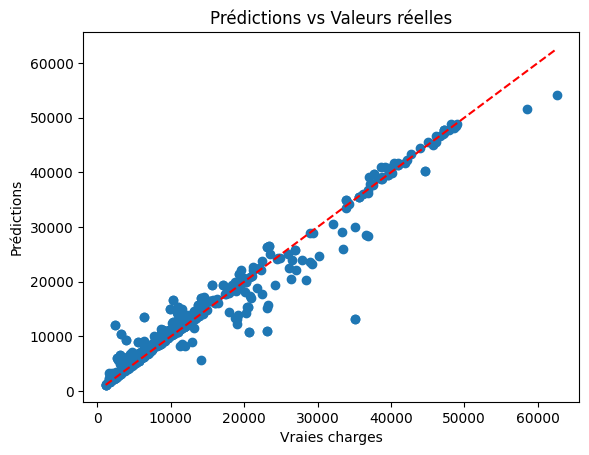

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, final_predictions)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], "r--")  # ligne parfaite
plt.xlabel("Vraies charges")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles")
plt.show()


In [ ]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

In [ ]:
rmse_lower, rmse_upper

(np.float64(2245.251579365921), np.float64(3340.5189830375043))

**Model persistence using joblib**

In [ ]:
import joblib

joblib.dump(final_model, "my_medical_insurance_model.pkl")

['my_medical_insurance_model.pkl']